In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [27]:
s1819 = pd.read_csv("player_stats_2018_2019.csv")

In [28]:
s1718 = pd.read_csv("player_stats_2017_2018.csv")

In [29]:
%store -r clustering_data

In [30]:
clustering_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Delta AST%,Delta PTS,Delta TRB,Delta AST,Delta STL,Delta BLK,Opportunity,Impt Deltas,Defensive Ability,Total Mins
5380,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.384615,428.4
5381,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,1.1,0.0,0.5,0.4,0.3,0.0,-1.4,0.9,0.961538,2672.0
5382,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,3.2,2.0,1.8,0.7,0.4,0.2,-3.3,4.5,0.680000,1910.6
5385,8,LaMarcus Aldridge\aldrila01,C,33,SAS,81,81,33.2,8.4,16.3,...,0.3,-1.8,0.7,0.4,-0.1,0.1,-2.5,-0.7,0.818182,2689.2
5387,10,Grayson Allen\allengr01,SG,23,UTA,38,2,10.9,1.8,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,414.2


# Subset 1: True Shooting%, Points, Rebound+Assist

In [31]:
TS_Pts_RA = pd.DataFrame(data=[s1819["TS%"],s1819["PTS"],s1819["TRB"]+s1819["AST"]], index=['TS','PTS',"RA"])

In [32]:
TS_Pts_RA = TS_Pts_RA.transpose()

In [33]:
TS_Pts_RA = TS_Pts_RA.dropna()

In [34]:
kmeans = KMeans(n_clusters=5)

In [35]:
kmeans.fit(TS_Pts_RA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
kmeans.cluster_centers_

array([[ 0.54700719,  6.42589928,  4.70431655],
       [ 0.56957895, 16.93684211,  9.31403509],
       [ 0.55935556, 10.96555556,  7.56222222],
       [ 0.58060714, 24.57857143, 13.23214286],
       [ 0.48038889,  2.76031746,  2.00634921]])

In [37]:
kmeans.labels_

array([4, 4, 4, 1, 2, 4, 4, 3, 4, 4, 2, 2, 2, 4, 2, 4, 3, 4, 2, 0, 0, 2,
       1, 0, 1, 4, 2, 0, 2, 2, 0, 2, 0, 0, 2, 3, 2, 0, 2, 4, 2, 0, 4, 0,
       2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 4, 3, 4, 0, 0, 0, 4, 4, 1, 0, 0,
       4, 2, 4, 0, 0, 2, 2, 4, 0, 4, 2, 1, 2, 4, 0, 2, 2, 0, 2, 4, 4, 4,
       4, 4, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 4, 0, 3, 0, 3, 0,
       0, 4, 2, 4, 0, 3, 4, 0, 4, 0, 1, 0, 3, 2, 4, 2, 1, 0, 2, 3, 4, 4,
       3, 4, 4, 2, 0, 2, 0, 4, 0, 0, 0, 2, 1, 1, 4, 4, 4, 0, 1, 0, 0, 1,
       3, 2, 0, 2, 1, 4, 1, 1, 0, 0, 0, 2, 0, 4, 2, 2, 0, 2, 3, 4, 4, 3,
       0, 1, 0, 2, 2, 0, 0, 4, 4, 2, 0, 0, 0, 0, 4, 1, 4, 4, 0, 0, 3, 2,
       0, 1, 0, 2, 2, 4, 1, 0, 1, 0, 0, 2, 4, 1, 3, 2, 0, 4, 0, 2, 2, 1,
       3, 4, 0, 4, 4, 0, 3, 0, 0, 4, 0, 4, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 3, 0, 4, 4, 1, 2, 3, 0, 4, 2, 3, 4, 4, 0, 2, 2, 1, 1, 4,
       4, 4, 0, 4, 4, 4, 0, 1, 4, 0, 4, 4, 4, 1, 0, 0, 2, 0, 0, 4, 0, 0,
       0, 0, 4, 1, 0, 4, 2, 2, 4, 3, 4, 0, 2, 4, 2,

## Static 3D graph

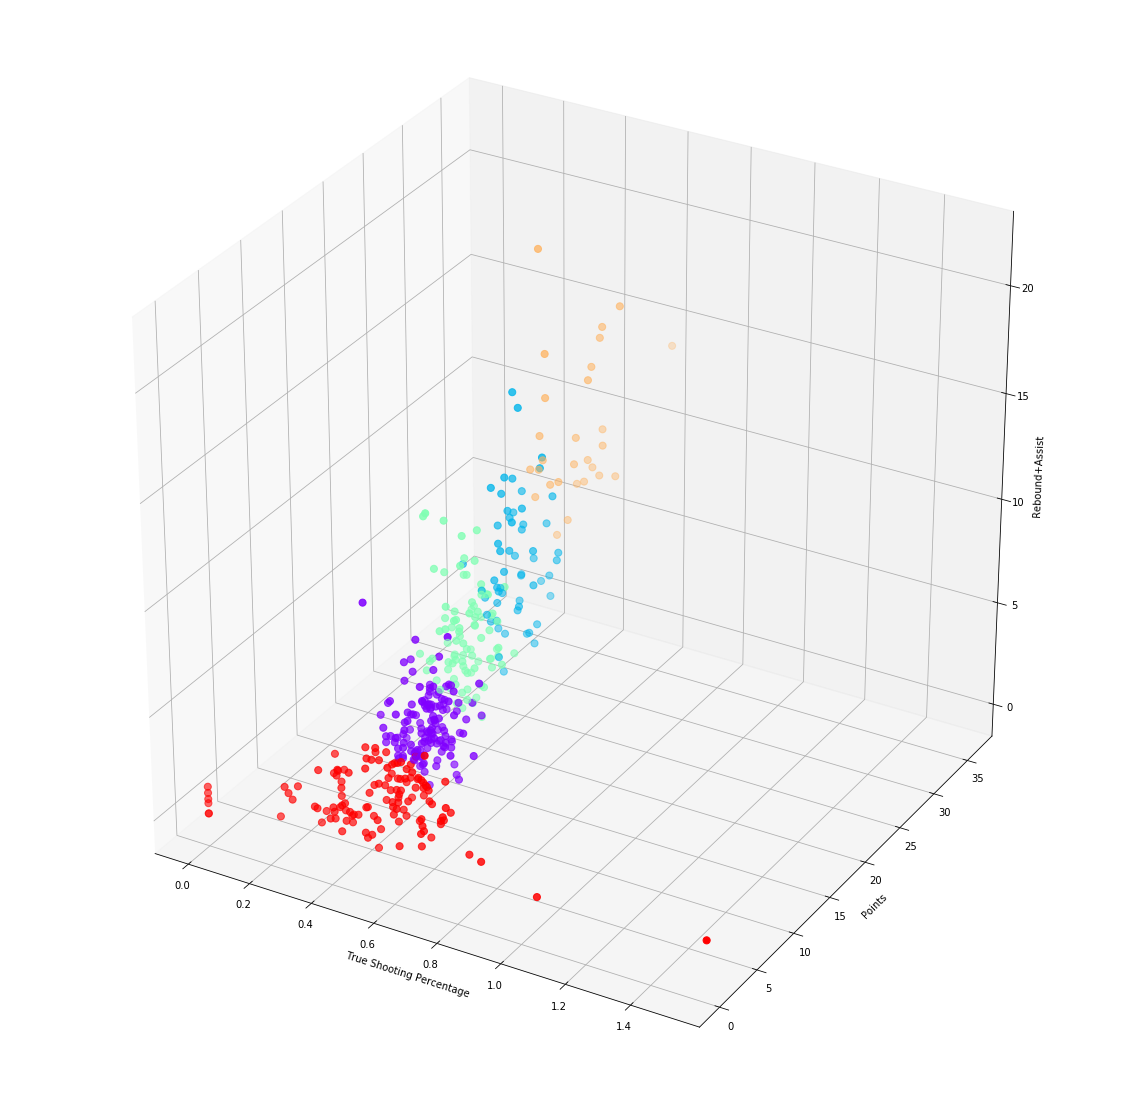

In [38]:
rcParams['figure.figsize'] = 20,20
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = TS_Pts_RA.TS
y = TS_Pts_RA.PTS
z = TS_Pts_RA.RA



ax.scatter(x, y, z, c=kmeans.labels_, cmap='rainbow', s=50, marker='o')

ax.set_xlabel('True Shooting Percentage')
ax.set_ylabel('Points')
ax.set_zlabel('Rebound+Assist')

plt.show()

## Interactive 3D graph

In [39]:
fig = px.scatter_3d(TS_Pts_RA, x='TS', y='PTS', z='RA',
              color=kmeans.labels_, width=1000, height=1000, color_continuous_scale='Portland')
fig.update_traces(marker=dict(size=5))

fig.show()

# Subset 2: BPM, 

In [40]:
clustering_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Delta AST%,Delta PTS,Delta TRB,Delta AST,Delta STL,Delta BLK,Opportunity,Impt Deltas,Defensive Ability,Total Mins
5380,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.384615,428.4
5381,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,1.1,0.0,0.5,0.4,0.3,0.0,-1.4,0.9,0.961538,2672.0
5382,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,3.2,2.0,1.8,0.7,0.4,0.2,-3.3,4.5,0.680000,1910.6
5385,8,LaMarcus Aldridge\aldrila01,C,33,SAS,81,81,33.2,8.4,16.3,...,0.3,-1.8,0.7,0.4,-0.1,0.1,-2.5,-0.7,0.818182,2689.2
5387,10,Grayson Allen\allengr01,SG,23,UTA,38,2,10.9,1.8,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,414.2


In [41]:
subset_2 = pd.DataFrame(data=[clustering_data["Delta AST%"],clustering_data["Delta PTS"],clustering_data["Delta TRB"]], index=['Delta AST','Delta PTS',"Delta TRB"])

In [42]:
subset_2 = subset_2.transpose()

In [43]:
subset_2 = subset_2.dropna()

In [44]:
kmeans = KMeans(n_clusters=5)

In [45]:
kmeans.fit(subset_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
kmeans.cluster_centers_

array([[  1.48450704,  -0.08028169,   0.11830986],
       [  7.6125    ,   2.665625  ,   1.184375  ],
       [-15.12      ,  -4.36      ,  -0.2       ],
       [  1.175     ,   4.94545455,   1.95227273],
       [ -3.88518519,  -0.42962963,  -0.10555556]])

In [47]:
kmeans.labels_

array([0, 0, 0, 3, 1, 0, 0, 1, 0, 3, 0, 4, 4, 2, 4, 3, 3, 3, 4, 0, 3, 0,
       3, 1, 3, 2, 0, 1, 3, 4, 3, 4, 0, 4, 3, 0, 0, 1, 0, 4, 4, 0, 1, 4,
       1, 0, 0, 3, 0, 0, 4, 3, 4, 4, 4, 0, 3, 2, 4, 0, 3, 0, 4, 3, 0, 1,
       3, 4, 1, 3, 0, 3, 0, 4, 3, 0, 4, 0, 0, 4, 0, 3, 4, 3, 4, 0, 1, 3,
       0, 3, 4, 1, 4, 4, 4, 3, 0, 0, 4, 0, 3, 0, 0, 4, 4, 0, 4, 1, 1, 1,
       0, 0, 0, 0, 3, 0, 4, 3, 3, 0, 3, 0, 4, 0, 1, 4, 4, 0, 0, 3, 4, 0,
       3, 3, 3, 0, 0, 0, 4, 3, 4, 0, 0, 2, 1, 4, 1, 0, 1, 4, 0, 4, 3, 1,
       4, 1, 0, 0, 0, 3, 1, 3, 4, 1, 4, 3, 0, 0, 1, 1, 0, 2, 3, 4, 4, 4,
       0, 4, 0, 1, 0, 1, 4, 1, 0, 1, 0, 0, 3, 4, 3, 4, 4, 0, 4, 1, 4, 0,
       1, 0, 3, 1, 4, 0, 1, 3], dtype=int32)

In [48]:
subset_2.head()

,Delta AST,Delta PTS,Delta TRB
5381,1.1,0.0,0.5
5382,3.2,2.0,1.8
5385,0.3,-1.8,0.7
5388,2.5,2.7,3.0
5389,13.5,8.8,2.1


## Static 3D graph

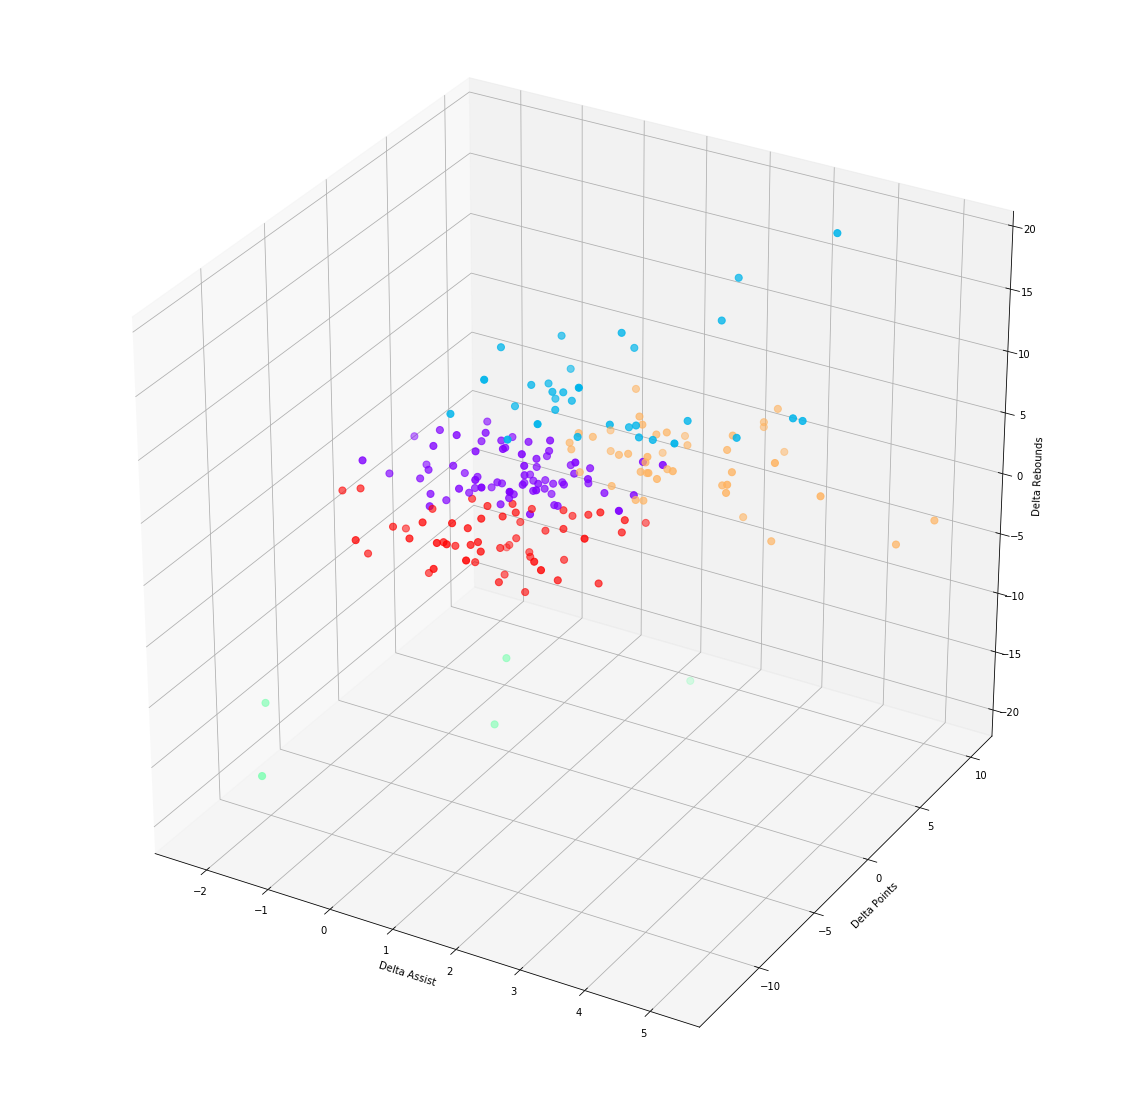

In [49]:
rcParams['figure.figsize'] = 20,20
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = subset_2["Delta TRB"]
y = subset_2["Delta PTS"]
z = subset_2["Delta AST"]



ax.scatter(x, y, z, c=kmeans.labels_, cmap='rainbow', s=50, marker='o')

ax.set_xlabel('Delta Assist')
ax.set_ylabel('Delta Points')
ax.set_zlabel('Delta Rebounds')

plt.show()

## Interactive 3D graph

In [50]:
fig = px.scatter_3d(subset_2, x=subset_2["Delta AST"], y=subset_2["Delta PTS"], z=subset_2["Delta TRB"],
              color=kmeans.labels_, width=1000, height=1000, color_continuous_scale='Portland')
fig.update_traces(marker=dict(size=5))

fig.show()